In [1]:
# env: gen ai
from sdv.datasets.demo import download_demo

In [2]:
real_data, metadata = download_demo(
    modality='sequential',
    dataset_name='nasdaq100_2019'
)

In [3]:
real_data.head()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAPL,2018-12-31,39.632500,39.435001,140014000,7.378734e+11,Technology,Computer Manufacturing
1,AAPL,2019-01-02,38.722500,39.480000,148158800,7.378734e+11,Technology,Computer Manufacturing
2,AAPL,2019-01-03,35.994999,35.547501,365248800,7.378734e+11,Technology,Computer Manufacturing
3,AAPL,2019-01-04,36.132500,37.064999,234428400,7.378734e+11,Technology,Computer Manufacturing
4,AAPL,2019-01-07,37.174999,36.982498,219111200,7.378734e+11,Technology,Computer Manufacturing


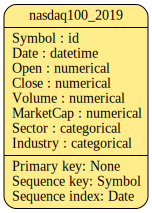

In [4]:
metadata.visualize()

In [5]:
amzn_sequence = real_data[real_data['Symbol'] == 'AMZN']
amzn_sequence

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
252,AMZN,2018-12-31,1510.800049,1501.969971,6954500,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
253,AMZN,2019-01-02,1465.199951,1539.130005,7983100,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
254,AMZN,2019-01-03,1520.010010,1500.280029,6975600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
255,AMZN,2019-01-04,1530.000000,1575.390015,9182600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
256,AMZN,2019-01-07,1602.310059,1629.510010,7993200,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
...,...,...,...,...,...,...,...,...
499,AMZN,2019-12-23,1788.260010,1793.000000,2136400,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
500,AMZN,2019-12-24,1793.810059,1789.209961,881300,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
501,AMZN,2019-12-26,1801.010010,1868.770020,6005400,4.035002e+11,Consumer Services,Catalog/Specialty Distribution
502,AMZN,2019-12-27,1882.920044,1869.800049,6186600,4.035002e+11,Consumer Services,Catalog/Specialty Distribution


In [6]:
real_data['Symbol'].unique()

array(['AAPL', 'AMZN', 'MSFT', 'FB', 'TSLA', 'GOOGL', 'GOOG', 'NVDA',
       'ADBE', 'PYPL', 'NFLX', 'INTC', 'CMCSA', 'PEP', 'CSCO', 'COST',
       'AVGO', 'QCOM', 'TMUS', 'TXN', 'AMGN', 'CHTR', 'SBUX', 'AMD', 'ZM',
       'INTU', 'ISRG', 'MDLZ', 'GILD', 'JD', 'BKNG', 'VRTX', 'FISV',
       'ADP', 'ATVI', 'REGN', 'MELI', 'CSX', 'AMAT', 'MU', 'LRCX', 'ADSK',
       'ILMN', 'BIIB', 'ADI', 'DOCU', 'LULU', 'MNST', 'WDAY', 'CTSH',
       'EXC', 'EBAY', 'KHC', 'EA', 'NXPI', 'BIDU', 'XEL', 'DXCM', 'SGEN',
       'CTAS', 'IDXX', 'ORLY', 'SNPS', 'ROST', 'KLAC', 'SPLK', 'CDNS',
       'NTES', 'MAR', 'VRSK', 'WBA', 'PCAR', 'ASML', 'PAYX', 'MRNA',
       'ANSS', 'XLNX', 'MCHP', 'CPRT', 'ALXN', 'ALGN', 'FAST', 'SWKS',
       'SIRI', 'VRSN', 'PDD', 'CERN', 'DLTR', 'INCY', 'MXIM', 'TTWO',
       'CDW', 'CHKP', 'CTXS', 'TCOM', 'BMRN', 'ULTA', 'EXPE', 'WDC',
       'FOXA', 'LBTYK', 'FOX', 'LBTYA'], dtype=object)

In [7]:
# Context columns
real_data[real_data['Symbol'] == 'AMZN']['Sector'].unique()

array(['Consumer Services'], dtype=object)

## Creating a synthesizer

In [8]:
from sdv.sequential import PARSynthesizer

In [9]:
synthesizer = PARSynthesizer(
    metadata,
    context_columns=['Sector', 'Industry'],
    verbose=True)

synthesizer.fit(real_data)

/home/luis-carlos/anaconda3/envs/gen_ai/lib/python3.11/site-packages/sdv/sequential/par.py:318: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[self._sequence_index].diff().bfill())
Loss (-1.413): 100%|██████████| 128/128 [03:08<00:00,  1.47s/it]


## Generating synthetic data

In [10]:
synthetic_data = synthesizer.sample(num_sequences=10)
synthetic_data.head()

100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAA,2019-01-02,203.597954,5.270000,10000,NaN,Consumer Non-Durables,Apparel
1,AAAA,2019-01-04,58.899237,147.904690,2818328,5.893961e+09,Consumer Non-Durables,Apparel
2,AAAA,2019-01-06,183.437196,68.916069,10000,5.893961e+09,Consumer Non-Durables,Apparel
3,AAAA,2019-01-08,112.074032,137.034357,1300846,8.273275e+09,Consumer Non-Durables,Apparel
4,AAAA,2019-01-09,140.537013,146.723425,3880373,1.509756e+10,Consumer Non-Durables,Apparel


In [11]:
synthetic_data[['Symbol', 'Industry']].groupby(['Symbol']).first().reset_index()

,Symbol,Industry
0,AAAA,Apparel
1,AAAB,Beverages (Production/Distribution)
2,AAAC,RETAIL: Building Materials
3,AAAD,Television Services
4,AAAE,Medical/Nursing Services
5,AAAF,Packaged Foods
6,AAAG,Catalog/Specialty Distribution
7,AAAH,Business Services
8,AAAI,Television Services
9,AAAJ,Semiconductors


## Saving and loading

In [12]:
synthesizer.save('my_synthesizer.pkl')

In [13]:
from sdv.utils import load_synthesizer

In [14]:
synthesizer = load_synthesizer('my_synthesizer.pkl')
synthesizer.sample(num_sequences=1).head()

100%|██████████| 1/1 [00:02<00:00,  2.49s/it]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAK,2018-12-31,244.573415,129.834766,10000,5.893961e+09,Technology,Computer Software: Prepackaged Software
1,AAAK,2019-01-01,149.346746,166.094864,2156185,3.410672e+10,Technology,Computer Software: Prepackaged Software
2,AAAK,2019-01-03,168.258208,162.551342,6569659,2.190875e+10,Technology,Computer Software: Prepackaged Software
3,AAAK,2019-01-04,183.545109,178.889820,422894,4.218749e+10,Technology,Computer Software: Prepackaged Software
4,AAAK,2019-01-05,183.437196,193.468242,1211534,5.667494e+10,Technology,Computer Software: Prepackaged Software


## PAR customization

In [15]:
custom_synthesizer = PARSynthesizer(
    metadata,
    epochs=250,
    context_columns=['Sector', 'Industry'],
    enforce_min_max_values=False,
    verbose=True)

custom_synthesizer.fit(real_data)

/home/luis-carlos/anaconda3/envs/gen_ai/lib/python3.11/site-packages/sdv/sequential/par.py:318: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[self._sequence_index].diff().bfill())
Loss (-2.623): 100%|██████████| 250/250 [06:29<00:00,  1.56s/it]


## Sampling options
### Specify sequence length

In [16]:
custom_synthesizer.sample(num_sequences=3, sequence_length=2)

100%|██████████| 3/3 [00:00<00:00, 23.24it/s]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,AAAC,2019-01-02,193.176666,225.949748,-5702943,NaN,Consumer Non-Durables,Apparel
1,AAAC,2019-01-04,214.778462,179.407045,1319647,NaN,Consumer Non-Durables,Apparel
2,AAAA,2018-12-31,89.271927,183.531971,-2526904,NaN,Technology,Business Services
3,AAAA,2019-01-01,65.724588,143.044905,949343,3.889775e+10,Technology,Business Services
4,AAAB,2019-01-01,224.288248,273.456905,9883444,8.995945e+10,Technology,Television Services
5,AAAB,2019-01-03,205.394265,234.186304,2294491,1.579867e+10,Technology,Television Services


In [17]:
long_sequence = custom_synthesizer.sample(num_sequences=1, sequence_length=500)

100%|██████████| 1/1 [00:08<00:00,  8.20s/it]


In [18]:
long_sequence.tail()

,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
495,AAAD,2022-09-30,75.987618,54.000804,11339156,1.291913e+11,Technology,Packaged Foods
496,AAAD,2022-10-03,70.033309,45.214030,-930027,1.327219e+11,Technology,Packaged Foods
497,AAAD,2022-10-07,50.030448,75.241568,9880156,1.262980e+11,Technology,Packaged Foods
498,AAAD,2022-10-10,38.658068,28.705392,17448579,1.179855e+11,Technology,Packaged Foods
499,AAAD,2022-10-14,69.660817,62.316289,4540071,1.338740e+11,Technology,Packaged Foods


## Conditional sampling

In [19]:
import pandas as pd

In [20]:
scenario_context = pd.DataFrame(data={
    'Symbol': ['COMPANY-A', 'COMPANY-B', 'COMPANY-C', 'COMPANY-D', 'COMPANY-E'],
    'Sector': ['Technology']*2 + ['Consumer Services']*3,
    'Industry': ['Computer Manufacturing', 'Computer Software: Prepackaged Software',
                 'Hotels/Resorts', 'Restaurants', 'Clothing/Shoe/Accessory Stores']
})

scenario_context

,Symbol,Sector,Industry
0,COMPANY-A,Technology,Computer Manufacturing
1,COMPANY-B,Technology,Computer Software: Prepackaged Software
2,COMPANY-C,Consumer Services,Hotels/Resorts
3,COMPANY-D,Consumer Services,Restaurants
4,COMPANY-E,Consumer Services,Clothing/Shoe/Accessory Stores


In [21]:
custom_synthesizer.sample_sequential_columns(
    context_columns=scenario_context,
    sequence_length=2
)

100%|██████████| 5/5 [00:00<00:00, 35.07it/s]


,Symbol,Date,Open,Close,Volume,MarketCap,Sector,Industry
0,COMPANY-A,2018-12-31,96.426978,392.376393,19614595,2.183168e+10,Technology,Computer Manufacturing
1,COMPANY-A,2019-01-01,172.778548,123.266508,18938674,1.034917e+11,Technology,Computer Manufacturing
2,COMPANY-B,2019-01-02,183.437196,54.106879,15338906,8.822542e+10,Technology,Computer Software: Prepackaged Software
3,COMPANY-B,2019-01-03,96.880693,173.056415,2074703,NaN,Technology,Computer Software: Prepackaged Software
4,COMPANY-C,2019-01-01,183.437196,158.635863,6569659,NaN,Consumer Services,Hotels/Resorts
5,COMPANY-C,2019-01-02,183.437196,191.779609,11036491,6.370588e+10,Consumer Services,Hotels/Resorts
6,COMPANY-D,2018-12-31,224.723454,99.746781,6569659,NaN,Consumer Services,Restaurants
7,COMPANY-D,2019-01-01,108.080318,237.386664,13276835,4.372523e+10,Consumer Services,Restaurants
8,COMPANY-E,2018-12-31,167.605413,218.160655,6569659,2.306357e+10,Consumer Services,Clothing/Shoe/Accessory Stores
9,COMPANY-E,2019-01-01,94.914970,133.058765,4072528,4.289209e+10,Consumer Services,Clothing/Shoe/Accessory Stores
